# SUMMARY

### [Import libraries and files](#ch0)

## 1 - [Univariate analysis](#ch1)

## 2 - [Bivariate analysis](#ch2)

<a id="ch0"></a>
### Import libraries and files

In [37]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from fanalysis.pca import PCA
from sklearn import preprocessing, decomposition
from functions import *

from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy
import scipy.stats as st
import math

import dataframe_image as dfi

In [38]:
data = pd.read_csv('/Users/alexandremonod/Python/OC ML/p2/csv/cleaned.csv')

# First columns useless for analysis
data_analysis = data.drop([
                    'product_name'
                    , 'brands'
                    , 'additives_n'
                    , 'energy_100g'
                    , "labels_fr"
                    , "flag_organic"
                    ], axis=1)

path_figures = "/Users/alexandremonod/Python/OC ML/p2/figures" 

<a id="ch1"></a>
## 1 - Univariate analysis

In [39]:
dfi.export(data_analysis.describe(include = "all"), f"{path_figures}/data.png")
data_analysis.describe(include = "all")


,countries_fr,nutrition_grade_fr,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,pnns_groups_2
count,320492,320772,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772.000000,320772
unique,722,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42
top,États-Unis,e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown
freq,172998,141401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248905
mean,NaN,NaN,10.954737,4.244901,29.520881,13.904719,3.377148,6.526787,0.639236,0.253902,15.490332,NaN
std,NaN,NaN,15.953389,6.967258,26.419805,19.263548,3.546098,7.189889,0.660201,0.262979,7.505996,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.420000,0.100000,7.080000,2.000000,0.400000,1.000000,0.091440,0.036000,10.000000,NaN
50%,NaN,NaN,4.650000,1.790000,23.080000,6.500000,3.600000,4.400000,0.463000,0.184000,20.000000,NaN
75%,NaN,NaN,15.400000,5.000000,50.800000,16.130000,4.600000,8.742500,0.990600,0.393000,21.000000,NaN


In [40]:
# Number of unique values
[(i, len(data_analysis[i].unique())) for i in data_analysis.columns]

[('countries_fr', 723),
 ('nutrition_grade_fr', 5),
 ('fat_100g', 3374),
 ('saturated-fat_100g', 2195),
 ('carbohydrates_100g', 5402),
 ('sugars_100g', 4052),
 ('fiber_100g', 1002),
 ('proteins_100g', 2347),
 ('salt_100g', 2861),
 ('sodium_100g', 2651),
 ('nutrition-score-fr_100g', 96),
 ('pnns_groups_2', 42)]

Too many countries : 720 > 220 (total countries in the world). Let's see how many are really represented.

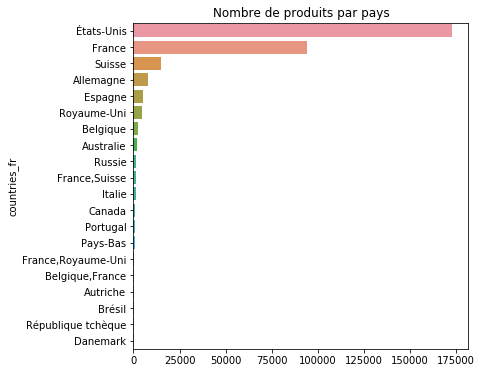

In [41]:
# Categs labels
nb_products_by_country = data_analysis.groupby('countries_fr').size().sort_values(ascending = False)[:20]

fig, ax = plt.subplots(1,1, figsize = (6, 6))

sns.barplot(x = nb_products_by_country, y = nb_products_by_country.index)

plt.title("Nombre de produits par pays")
plt.savefig(f"{path_figures}/produtcts_country")

About five main countries.  
US and France largely the most represented.

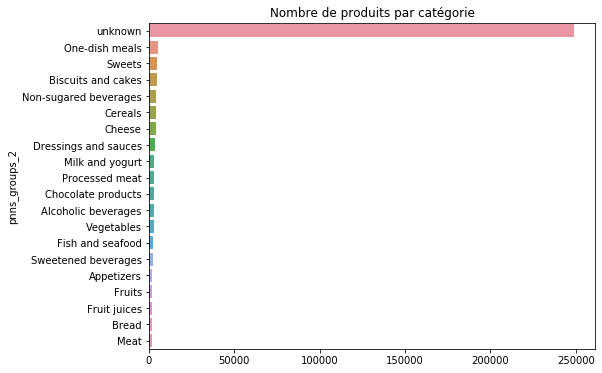

In [46]:
# Categs labels
nb_products_by_group = data_analysis.groupby('pnns_groups_2').size().sort_values(ascending = False)[:20]

fig, ax = plt.subplots(1,1, figsize = (8, 6))

sns.barplot(x = nb_products_by_group, y = nb_products_by_group.index)

plt.title("Nombre de produits par catégorie")
plt.savefig(f"{path_figures}/products_categ")

Many unknown values : in a real project, we could set multi-class classification, "me vs all" type to impute category/pnns.  

<a id="ch2"></a>
## 2 - Bivariate analysis

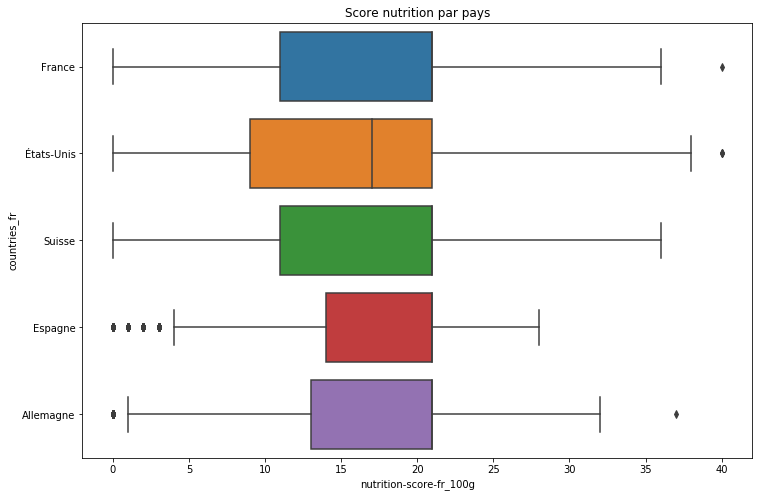

In [43]:
# Notes nutriscore

# Print five main ocuntries
countries5 = data_analysis.groupby('countries_fr').size().sort_values(ascending = False)[:5].index
data_plot = data_analysis[data_analysis.countries_fr.isin(countries5)]

fig, ax = plt.subplots(1,1, figsize = (12, 8))

sns.boxplot(y = data_plot.countries_fr, x = data_plot['nutrition-score-fr_100g'],
                    orient='h')

plt.title("Score nutrition par pays")
plt.savefig(f"{path_figures}/nutriscore_country")

Same pattern ; only US with medium around 14, around 18 for European countries.  
Careful : majority of products from France and US. Size effect important.

KeyboardInterrupt: 

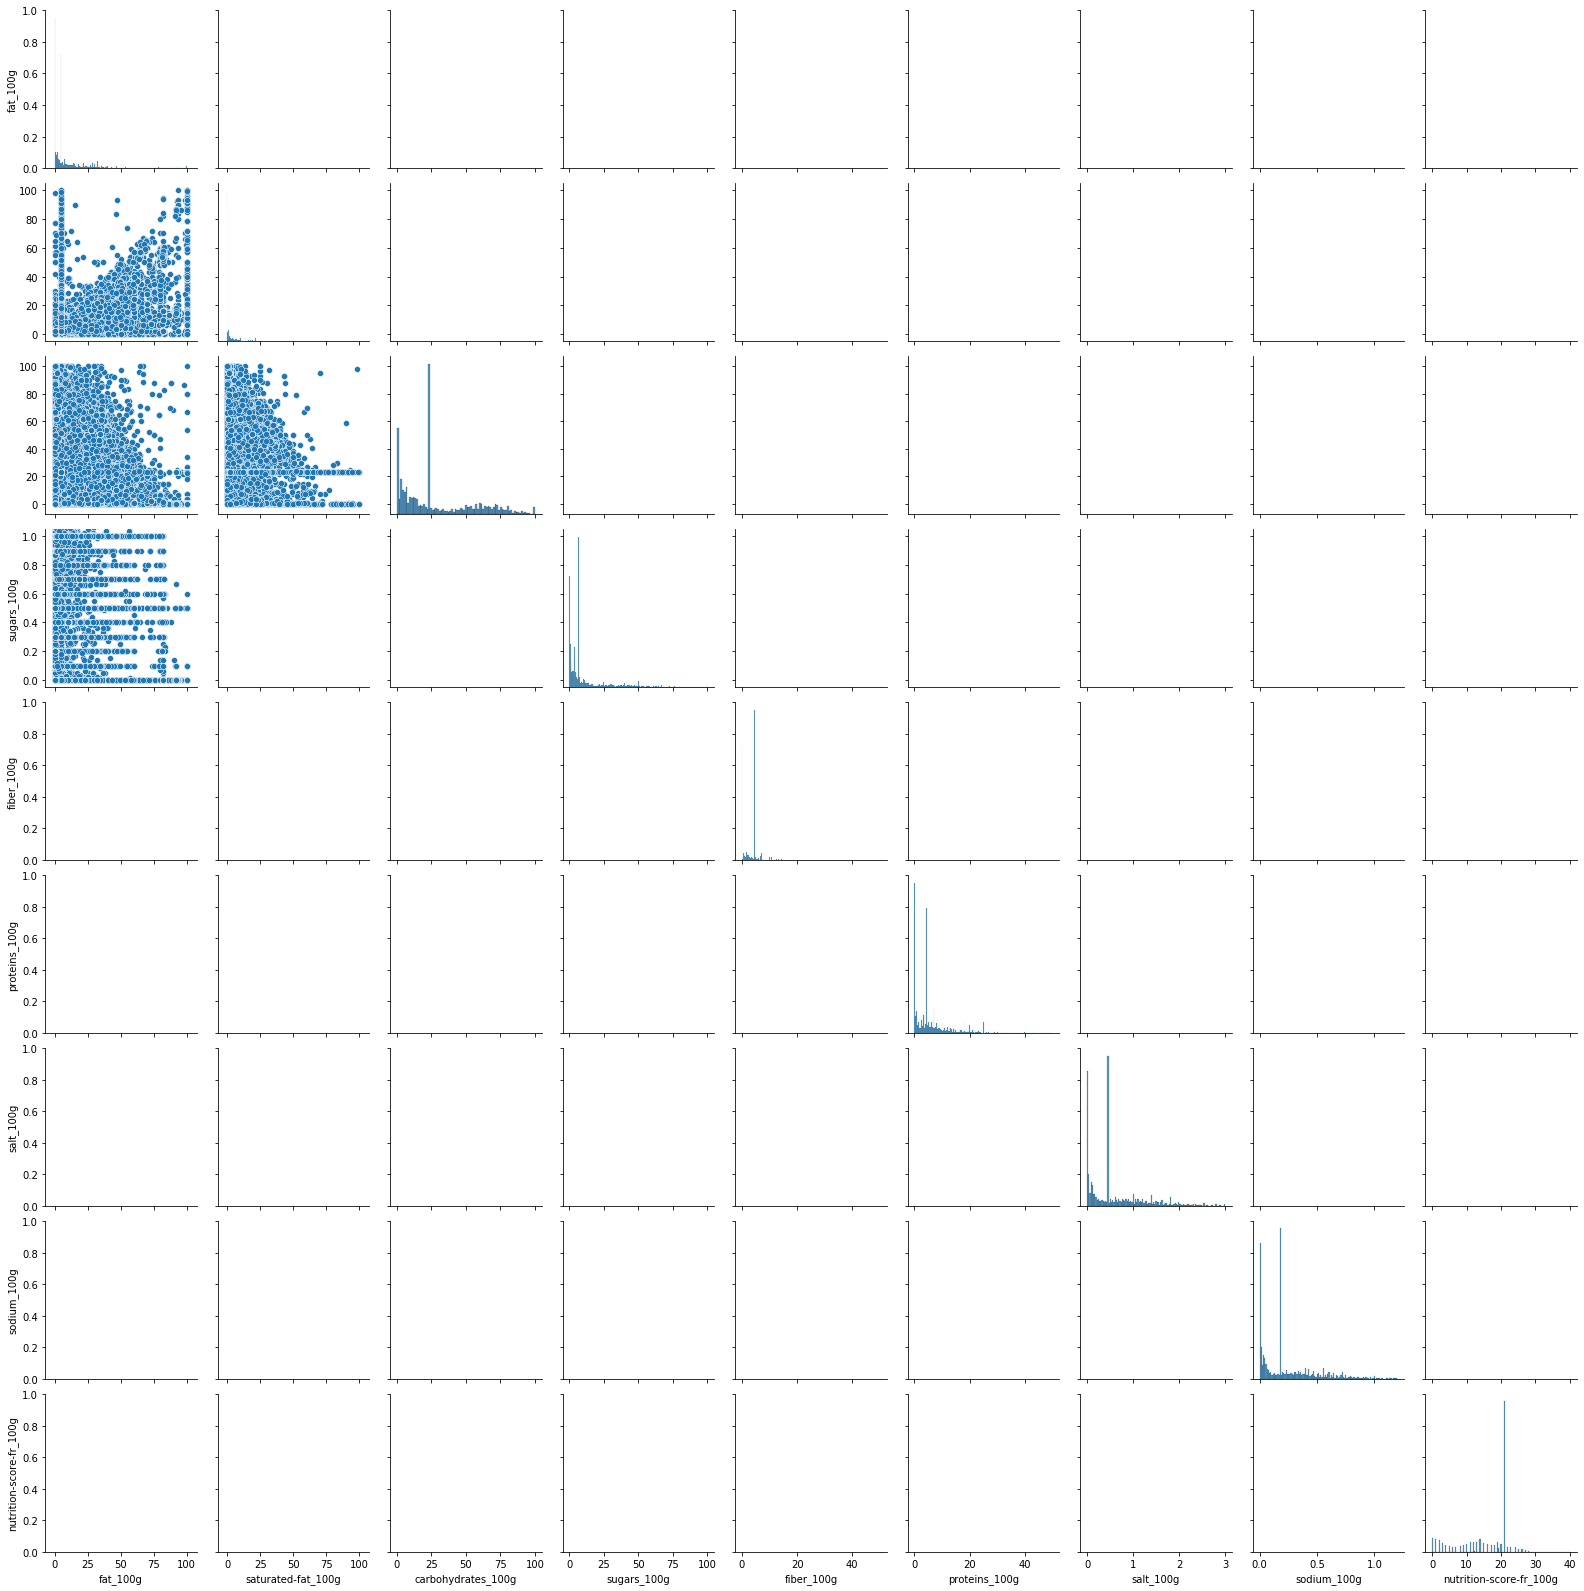

In [44]:
sns.pairplot(data_analysis)
plt.savefig(f"{path_figures}/pairplot")

As we've seen in correlation matrix :  
- Salt and sodium strongly correlated.  
- Nutriscore strongly correlated with sugar.  
- Sugars and carbohydrates
- Fat and saturated fat

In [ ]:
# ANOVA 

X = "nutrition_grade_fr"
Y = "fat_100g"

In [ ]:
linear_model = ols(f'{Y} ~ C({X})', data=data_analysis).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
print(table)

                             sum_sq        df            F  PR(>F)
C(nutrition_grade_fr)  6.735387e+06       4.0  7212.046285     0.0
Residual               7.488633e+07  320744.0          NaN     NaN


In [ ]:
pvalue = linear_model.f_pvalue
print('p-value is {}'.format(pvalue))

rsquared = math.sqrt(linear_model.rsquared)
print('r squared is {}'.format(round(rsquared, 2)))

p-value is 0.0
r squared is 0.29


Null p-value : H0 rejected.
Strong r squared : there is a link between the features.

In [ ]:
modalites = data_analysis[X].unique()
groupes = []
for m in modalites:
    groupes.append(data_analysis[data_analysis[X] == m][Y])

# Test ANOVA assumptions :
    # Normalitu
w, pvalue = st.shapiro(linear_model.resid)
print(f"Shapiro-Wilk : {w}, pvalue : {pvalue}")

    # Homoscadasticity
levene, pvalue = st.levene(groupes[0], groupes[1], groupes[2], groupes[3], groupes[4])
print(f"Levene : {levene}, pvalue : {pvalue}")

    # Independance
bartlett, pvalue = st.bartlett(groupes[0], groupes[1], groupes[2], groupes[3], groupes[4])
print(f"Bartlett : {bartlett}, pvalue : {pvalue}")

Shapiro-Wilk : 0.7600829005241394, pvalue : 0.0
Levene : 5347.54727528268, pvalue : 0.0
Bartlett : 95298.66010815799, pvalue : 0.0


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Non parametric assumption
kruskal_wallis, pvalue = st.kruskal(groupes[0], groupes[1], groupes[2], groupes[3], groupes[4])
print(f"Kruskal-Wallis : {kruskal_wallis}, pvalue : {pvalue}")

Kruskal-Wallis : 38745.35780889188, pvalue : 0.0


Null p-value : samples are different.

# ACP


J'utilise la bibliothèque scikit-learn pour afficher le cercle des corrélations et le nuage des individus, et la bibliothèque fanalysis pour l'éboulis des valeurs propres, la qualité de représentation des variables et des individus.  
Cela parce que fanalysis ne sait pas afficher de couleurs différentes selon le nom de l'individu, ce qui empêche de comprendre visuellement clairement le nuage.

In [ ]:
# PCA with fanalysis

data_analysis.dropna(inplace=True)   # Reste des Nan dans fiber probablement
columns_100g = data_analysis[[x for x in data_analysis if x.endswith("100g")]].columns.tolist()

acp = PCA(std_unit=True, row_labels=data_analysis['nutrition_grade_fr'].values, 
          col_labels=data_analysis.set_index("nutrition_grade_fr")[columns_100g].values)

# Fit
X = data_analysis[columns_100g].values
acp.fit(X)

PCA(col_labels=array([[ 4.65      ,  1.79      , 23.08      , ...,  0.6       ,
         0.23622047, 19.33333333],
       [28.57      , 28.57      , 64.29      , ...,  0.        ,
         0.        , 14.        ],
       [17.86      ,  0.        , 60.71      , ...,  0.635     ,
         0.25      ,  0.        ],
       ...,
       [27.4       ,  3.1       , 53.4       , ...,  1.6       ,
         0.62992126, 19.11111111],
       [ 4.65      ,  1.79      , 23.08      , ...,  0.6       ,
         0.23622047, 19.33333333],
       [ 0.        ,  1.79      ,  0.        , ...,  0.        ,
         0.        , 20.        ]]),
    row_labels=array(['e', 'd', 'b', ..., 'e', 'e', 'e'], dtype=object))

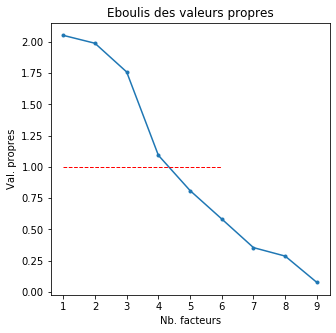

In [ ]:
# Scree plot of eigenvalues

# Préparation du graphique
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,10),acp.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Eboulis des valeurs propres")

# Kaiser rule
ax.plot([1,6],[1,1], "r--", linewidth = 1)
plt.savefig(f"{path_figures}/scree2")


Kaiser Rule : need 4 dimensions.

In [ ]:
n_comp = 4 # 4 main components needed

X = data_analysis[columns_100g].values

# prepare data for pca
features = columns_100g

# Scale data
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# PCA
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=4)

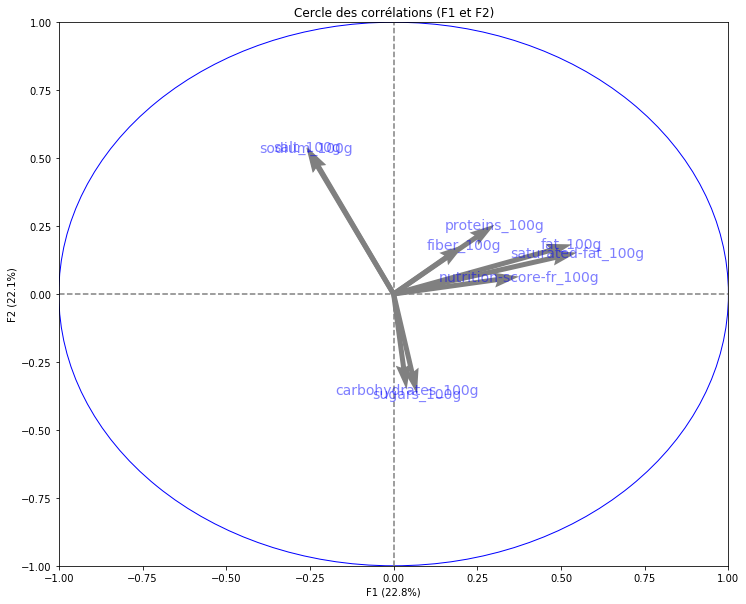

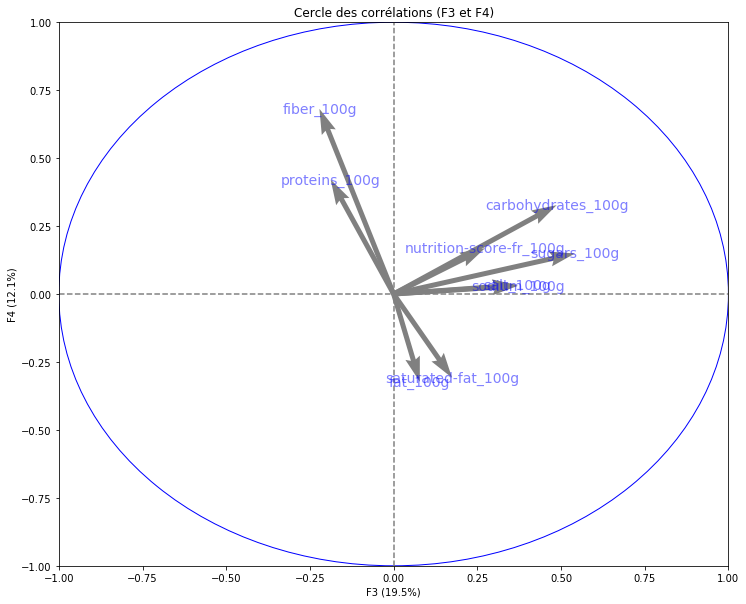

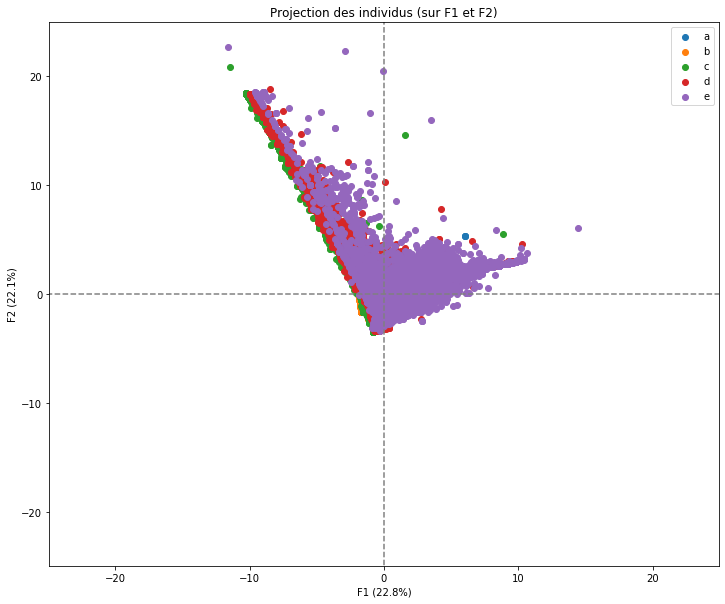

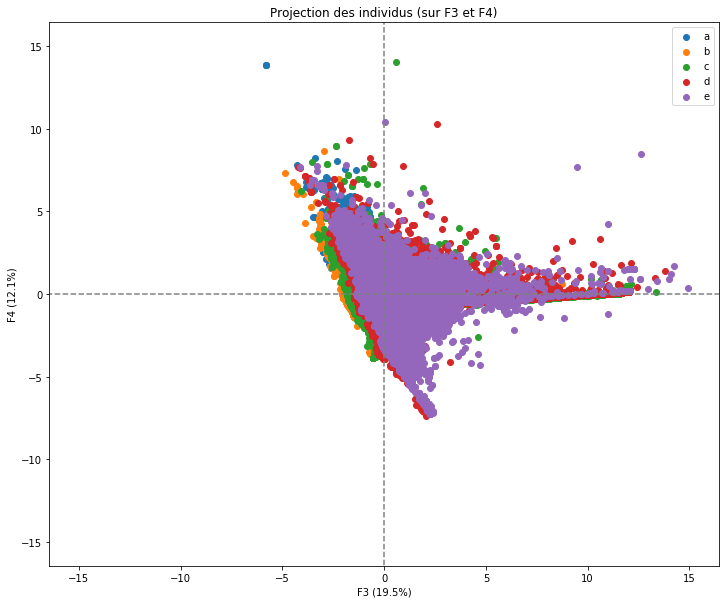

In [ ]:
# Correlation circle
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),[2,3]], labels = np.array(features))
plt.savefig(f"{path_figures}/ACP")

# Projection of points
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], illustrative_var = data_analysis["nutrition_grade_fr"])
plt.savefig(f"{path_figures}/indiv")

Confirmation of the observations of the correlation matrix : 
- salt and sodium identical
- fat and saturated fat strongly correlated
- sugars and carbohydrates strongly correlated
- nutriscore correlated with protein
- nutriscore badly represented here (0.25 out of 1)